Text(0, 0.5, 'Points per game')

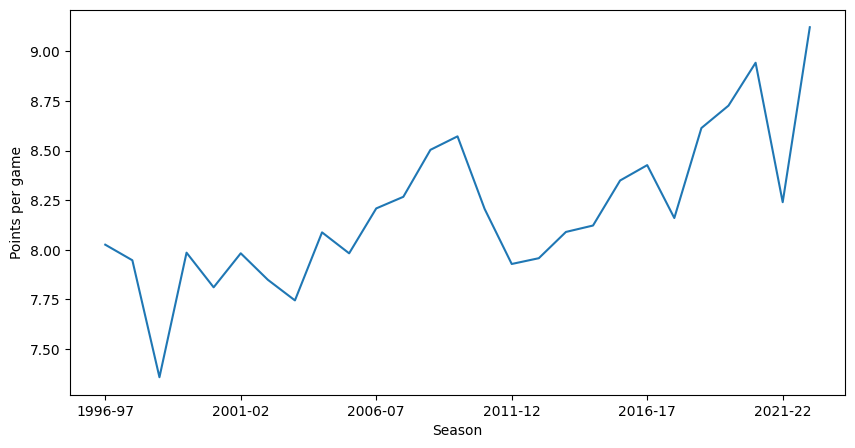

In [17]:
# Data Analysis w/ Pandas & Matplot (maybe numpy) on NBA players Dataframe

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# 
nba = pd.read_csv("/kaggle/input/nba-players-data/all_seasons.csv")
avg_ppg_by_season = nba.groupby("season")['pts'].mean()

graph = avg_ppg_by_season.plot(figsize=(10,5))
graph.set_xlabel('Season')
graph.set_ylabel('Points per game')
